In [7]:
# Import sklearn lib
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Import keras lib
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Numpy-Pandas-Matplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

## Importa i dati

In [29]:
raw_data = pd.read_csv('Traces/94429_T.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# Drop ID column
raw_data = raw_data.drop(['id'], axis=1)
raw_data = raw_data.drop(['time'], axis=1)

# Drop header and row-index
raw_values = raw_data.values

## Riscalamento dei dati

In [30]:
# Rescaliamo i dati prima si creare la barra delle predizioni
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(raw_data)
scaled = scaler.transform(raw_data)


## Creazione della colonna delle posizioni nel nest-time-step

In [31]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# Dataset in pandas Dataframe
supervised = timeseries_to_supervised(scaled, 1)
# Estrazione sottoforma di liste
supervised = supervised.values
# Conversione in numpy-array
supervised = np.asarray(supervised)
print('Forma dei dati: ', supervised.shape)

Forma dei dati:  (2701, 6)


## Test Autoregression

In [32]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

wnd_size = 3
list_pred_x = []
list_pred_y = []
for i in range(wnd_size + 1, len(supervised)):
    # Creazione del mini_batch -> matrice 3x6 dei 3 step precedenti
    mini_batch = supervised[i - wnd_size - 1 : i - 1]
    
    # Posizione dello step corrente
    new_batch = supervised[i-wnd_size:i, 0:3]
    
    # Regressione lineare sulle posizioni precedenti
    regr.fit(mini_batch[:, :3], mini_batch[:, 3:])
    
    # Predizione della posizione futura usando la posizione corrente
    pred = regr.predict(new_batch[: :3])
    
    list_pred_x.append(pred[0][0])
    list_pred_y.append(pred[0][1])
    
    MSE = np.sqrt(mean_squared_error(pred[0][0:3], supervised[i, 3:]))
    print('MSE: ', MSE)
    #print('Prediction:', pred)
    #print('True-pos:', supervised[i, 3:])


MSE:  0.2633420255454089
MSE:  0.1211041963132828
MSE:  0.10805369024557321
MSE:  0.11666414899491762
MSE:  0.022820792129112276
MSE:  0.2406989453699072
MSE:  0.2394342174065772
MSE:  0.19687672534294282
MSE:  0.05317056207686963
MSE:  0.27322241756990145
MSE:  0.43651292610475534
MSE:  0.30995580061024897
MSE:  0.1984303681490218
MSE:  0.0686473121370596
MSE:  0.04118453608079939
MSE:  0.01539414993713624
MSE:  0.008736827902771284
MSE:  0.006239617268774116
MSE:  0.001663999729364265
MSE:  0.0012478752215968484
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0


MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.010400660995670939
MSE:  0.022886088118870752
MSE:  0.028170085025237546
MSE:  0.017335140368641352
MSE:  0.014191357299324688
MSE:  0.027461146428925592
MSE:  0.020383807523216266
MSE:  0.007904468566876495
MSE:  0.003328414663557488
MSE:  0.002080028266291792
MSE:  0.0007048083717664847
MSE:  0.0008319168143924292
MSE:  3.589530347915986e-15
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  

MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0
MSE:  0.0


<IPython.core.display.Javascript object>


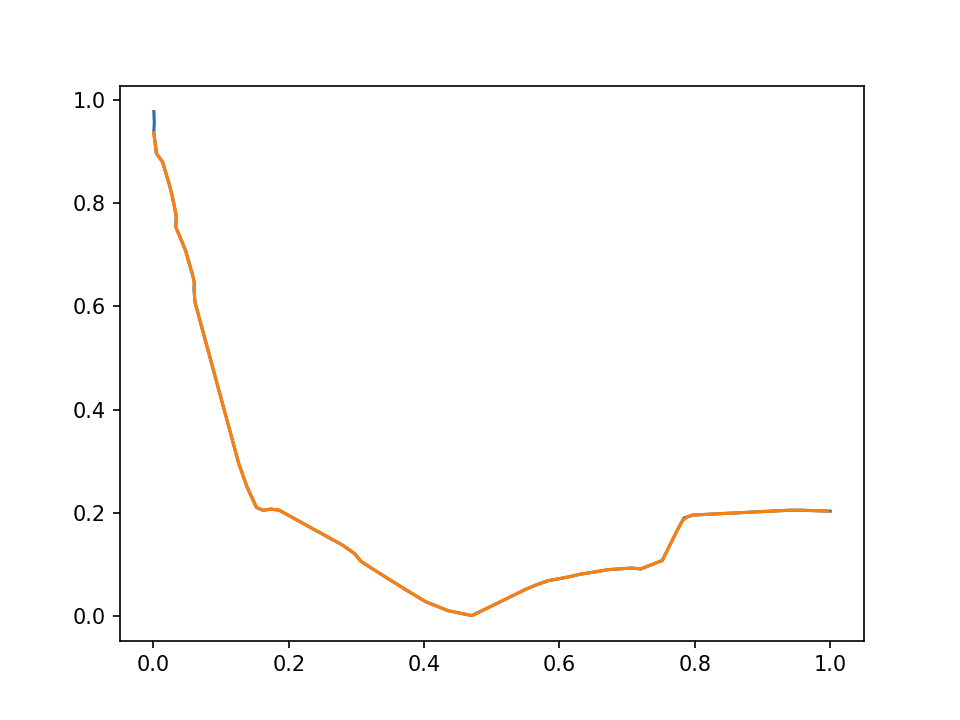

In [33]:
plt.figure()
plt.plot(supervised[1:, 0], supervised[1:, 1])
plt.plot(list_pred_x, list_pred_y)
plt.show()

## Network LSTM

In [6]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    
    # X =  feature -> prime 3 colonne
    # y = label -> ultime 3 colonne
    X, y = train[:, 0:3], train[:, 3:]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    #y = y.reshape(y.shape[0], 1, y.shape[1])
    print(y.shape)
    
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(3))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# fit the model
#lstm_model = fit_lstm(train, batch_size=1, nb_epoch=50, neurons=3)

## Selezione dei  Data-Window e predizione

In [ ]:
wnd_size = 3

for i in range(wnd_size + 1, len(supervised)):
    
    # Creazione del mini_batch
    mini_batch = supervised[i - wnd_size - 1 : i - 1]
    new_batch = supervised[i-wnd_size:i, 0:3]
    
    # Allenamento della rete sul mini_batch
    lstm_model = fit_lstm(mini_batch, batch_size=1, nb_epoch=10, neurons=3)
    
    X_reshaped = new_batch.reshape(len(new_batch), 1, 3)
    prediction = lstm_model.predict(X_reshaped, batch_size=1)[-1]
    
    print('Prediction:', prediction)
    print('True-pos:', supervised[i, 3:])
    #mse = np.sqrt(mean_squared_error(supervised[i, 3:], prediction))
    #print('mse:', mse)

(3, 3)
Prediction: [0.07269351 0.05652019 0.05257381]
True-pos: [0.67141097 0.02912905 0.3312369 ]
(3, 3)
Prediction: [ 0.2732272  -0.08516543  0.00035468]
True-pos: [0.67449595 0.03510496 0.27044025]
(3, 3)
Prediction: [ 0.06176561 -0.01336003  0.05528992]
True-pos: [0.67595952 0.03794004 0.12830189]
(3, 3)
Prediction: [-0.02018784 -0.18984084  0.06541154]
True-pos: [0.68894989 0.04020027 0.19622642]
(3, 3)
Prediction: [0.02338292 0.02062552 0.14679939]
True-pos: [0.69995775 0.03761373 0.27631027]
(3, 3)
Prediction: [-0.05680368  0.05033917  0.10671747]
True-pos: [0.7125859  0.03464647 0.31698113]
(3, 3)
Prediction: [0.01059532 0.0282171  0.02870595]
True-pos: [0.72462941 0.03181659 0.30230608]
(3, 3)
Prediction: [-0.06969381 -0.0926723   0.2596159 ]
True-pos: [0.73709051 0.02888858 0.31320755]
(3, 3)
Prediction: [-0.03239024 -0.0373879  -0.06645437]
True-pos: [0.75000263 0.0258546  0.32368973]
(3, 3)
Prediction: [0.16541597 0.00535251 0.11047447]
True-pos: [0.76221317 0.02298546 0.30

##  Conclusioni sul window-train

Allenare il network su window-size fissi per predire un step futuro non ha senso perchè ci impiega troppo per allenare e fare la predizione, inoltre le posizioni calcolate sono molto sbagliati rispetto a quelle vere [usando epoch=59, neurons=5].